# Final Project FP-3:  The GM's blueprint: Quantifying the value of positional units to maximize win probability in the NFL


<br>
<br>


___

<br>

# Quantifying the value of positional units to maximize win probability in the NFL


* **Name**:  Baier, Jonas
* **Student number**:  0490373562

<br>

### Purpose:

* The primary objective of this multivariate logistic regression analysis is to rigorously determine the marginal contribution of a comprehensive set of offensive, defensive, and special teams efficiency metrics to the probability of winning an NFL game. The analysis will conclude with a data-driven prioritization strategy for a General Manager, detailing which units or metrics (e.g., Passing Efficiency vs. Red Zone Defense) show the highest correlation with victory and therefore deserve the largest cap allocation and draft capital, and which can be safely deprioritized.
* The key **dependent variable** (DV) is is the **game result** as a standardized margin of victory, which is continuously between 0 and 1.
* The key **independent variable(s) (IVs)** are game-level differentials (Home Team Value - Away Team Value) aggregated from play-by-play data. These variables cover the spectrum of strategic decision-making:
* Passing Offense : **Differential Passing EPA** 
* Running Offense : **Differential Rushing EPA** 
* Situational Offense : **Differential Red Zone Score %** 
* Defensive Pressure : **Differential Sack Rate**
* Defensive Coverage : **Differential Defensive Pass EPA** 
* Turnover/Ball Security : **Differential Turnover Margin** 
* Situational Defense : **Differential 3rd Down Conversion %** 
* Special Teams : **Differential Field Goal EPA** 
* Game Control : **Differential Time of Possession (TOP)** 
* Discipline : **Differential Penalty Yards** 
* The raw Play-by-Play data contains over 5 Million cases (individual plays from 2017-2025). This will be aggregated into 2344 individual games. The analysis will calculate one dependent variable (DV) and ten comprehensive independent variables (IVs) from the raw data. 
<br>

### Dataset source:

The data comes from the [NFL](https://nfl.com) dataset from the [nflverse-data repository](https://github.com/nflverse/nflverse-data/releases)

The datasets are available for download [here](https://github.com/nflverse/nflverse-data/releases/tag/pbp).



In [8]:
import parse_data

In [10]:
df = parse_data.build_full_dataset("play_by_play")

In [13]:
df.describe()

,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2305.000000,2344.000000,2344.000000,2344.000000,2344.000000,1815.000000,0.0,2344.000000
mean,23.779010,21.927474,0.519785,0.004256,-0.010811,0.002372,0.002782,-0.004256,0.045648,0.019409,0.112704,NaN,2.268771
std,10.154494,9.842457,0.176142,0.464265,0.288061,0.122416,0.070155,0.464265,1.768520,0.194559,1.719014,NaN,36.708171
min,0.000000,0.000000,0.000000,-1.589303,-1.801176,-0.863636,-0.423077,-2.159788,-6.000000,-0.651515,-6.347030,NaN,-122.000000
25%,17.000000,16.000000,0.425000,-0.306462,-0.200528,-0.068182,-0.040078,-0.300871,-1.000000,-0.113636,-0.778405,NaN,-22.000000
50%,24.000000,21.000000,0.522727,0.000171,-0.021433,0.000000,0.001951,-0.000171,0.000000,0.018296,0.105750,NaN,2.000000
75%,30.000000,28.000000,0.622222,0.300871,0.177973,0.071429,0.046379,0.306462,1.000000,0.150000,0.921132,NaN,26.000000
max,70.000000,59.000000,1.000000,2.159788,0.950608,0.846154,0.310345,1.589303,6.000000,0.686869,6.267906,NaN,150.000000


___

## Descriptive Statistics



In [14]:
import descriptive

In [16]:
descriptive.display_central_tendency_table(df, num=1)
descriptive.display_dispersion_table(df, num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
mean,23.8,21.9,0.5198,0.004256,-0.010811,0.002372,0.002782,-0.004256,0.045648,0.019409,0.112704,NaN,2.268771
median,24.0,21.0,0.5227,0.000171,-0.021433,NaN,0.001951,-0.000171,0.000000,0.018296,NaN,NaN,2.000000
mode,20.0,20.0,0.6667,-1.589303,-1.801176,0.000000,0.000000,-2.159788,0.000000,0.000000,NaN,NaN,-5.000000


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,home_score,away_score,home_win_prob,diff_pass_off,diff_rush_off,diff_rz,diff_sack,diff_def_pass,diff_turnover,diff_third_down,diff_fg,diff_top,diff_pen
st.dev.,10.2,9.8,0.1761,0.464,0.288,0.122,0.070,0.464,1.768,0.195,1.719,NaN,36.7
min,0.0,0.0,0.0000,-1.589,-1.801,-0.864,-0.423,-2.160,-6.000,-0.652,-6.347,NaN,-122.0
max,70.0,59.0,1.0000,2.160,0.951,0.846,0.310,1.589,6.000,0.687,6.268,NaN,150.0
range,70.0,59.0,1.0000,3.749,2.752,1.710,0.733,3.749,12.000,1.338,12.615,NaN,272.0
25th,17.0,16.0,0.4250,-0.306,-0.201,NaN,-0.040,-0.301,-1.000,-0.114,NaN,NaN,-22.0
75th,30.0,28.0,0.6222,0.301,0.178,NaN,0.046,0.306,1.000,0.150,NaN,NaN,26.0
IQR,13.0,12.0,0.1972,0.607,0.379,NaN,0.086,0.607,2.000,0.264,NaN,NaN,48.0


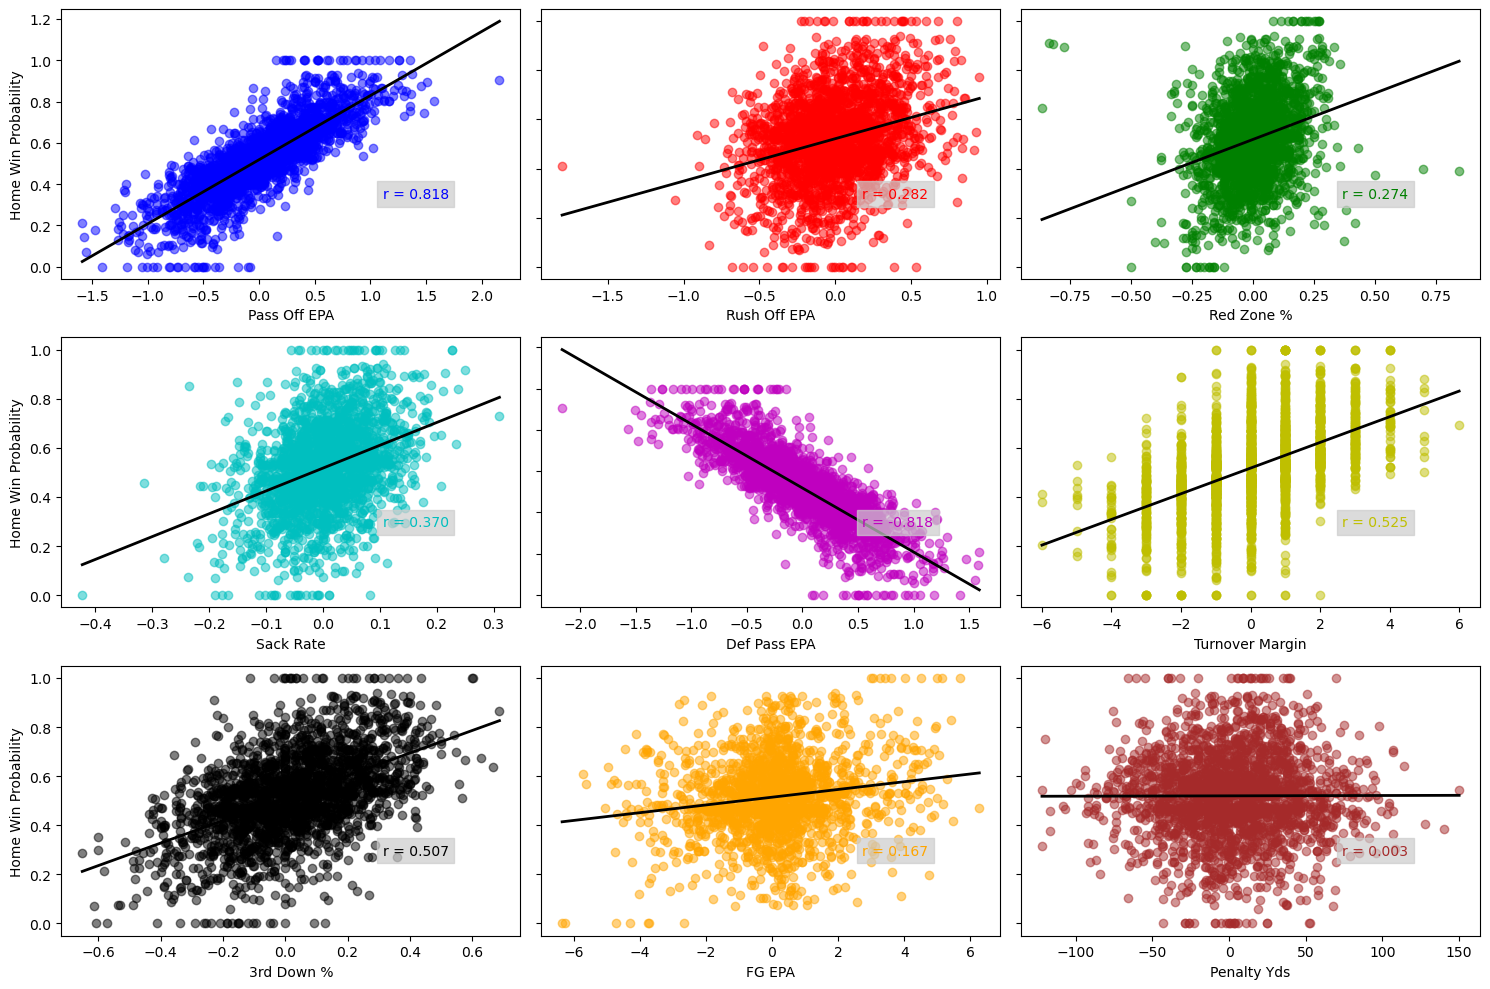

In [17]:
descriptive.plot_descriptive_final(df)